Importing necessary libraries and packages

In [ ]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

Reading the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CodSoft Projects/IMDb Movies India.csv',encoding='ISO-8859-1')

In [ ]:
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


# Data Preprocessing

Checking for missing values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


Removing NaN values

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.isna().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:
data.shape

(5659, 10)

Checking for duplicate values

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data.duplicated().sum()

0

Converting object dtypes to numerical dtypes

In [ ]:
data['Year'] = data['Year'].str.replace('[^\d]', '', regex=True)
data['Year'] = data['Year'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 486.3+ KB


In [ ]:
data['Duration'] = data['Duration'].str.replace(" min","")
data['Duration'] = data['Duration'].astype(int)

In [ ]:
data['Votes'] = data['Votes'].str.replace(',','')
data['Votes'] = data['Votes'].astype(int)

Selecting the main genre from multiple genre

In [ ]:
data["Main Genre"] = data.loc[:,"Genre"].str.extract("(^\w{1,11})")

In [ ]:
data["Main Genre"].unique()

array(['Drama', 'Comedy', 'Horror', 'Action', 'Crime', 'Thriller',
       'Adventure', 'Sport', 'Biography', 'Documentary', 'Mystery',
       'Musical', 'Romance', 'Fantasy', 'Sci', 'Family', 'History',
       'Animation', 'War', 'Music'], dtype=object)

# Exploratory Data Analysis

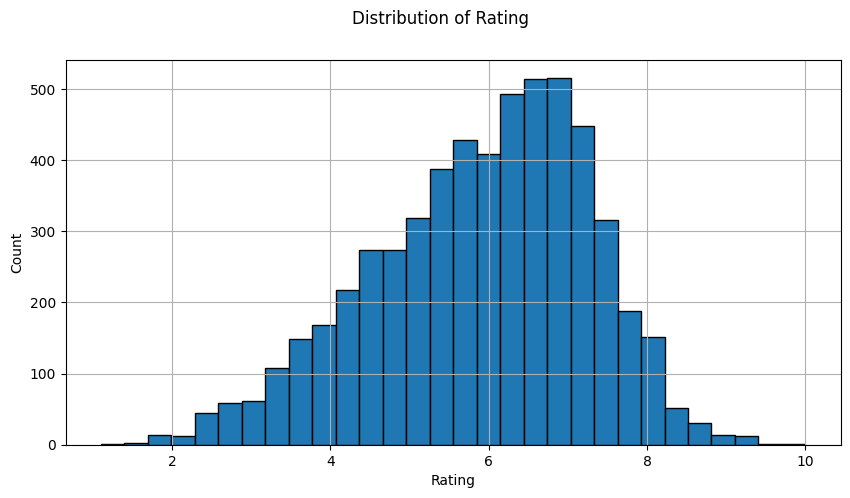

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
data['Rating'].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.suptitle('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

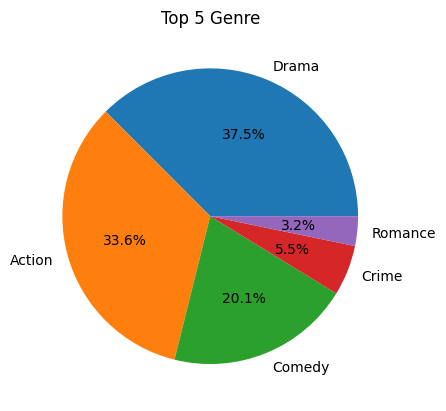

In [ ]:
Genre = data["Main Genre"].value_counts().reset_index()
top_five = Genre.head(5)
plt.pie(top_five['count'],labels = top_five['Main Genre'],autopct='%1.1f%%')
plt.title('Top 5 Genre')
plt.show()

In [ ]:
actors = pd.concat([data["Actor 1"],data["Actor 2"],data["Actor 3"]])
top_five_actors = actors.value_counts().head()

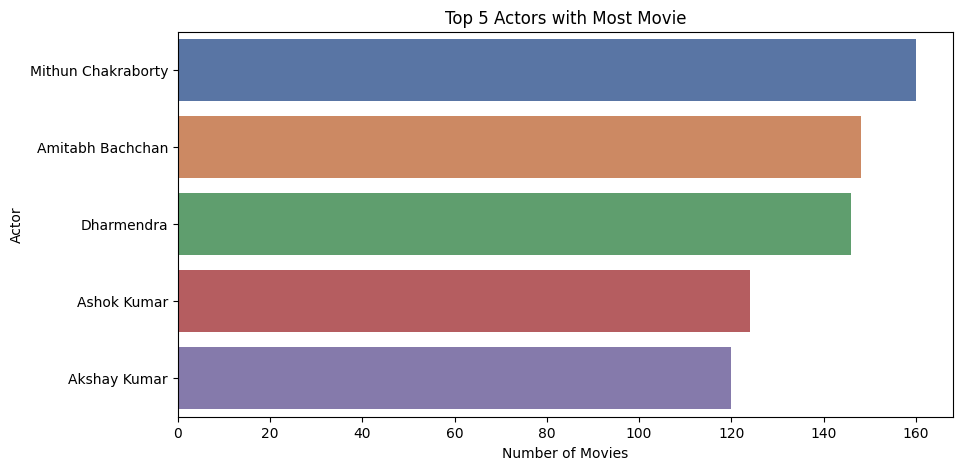

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_five_actors.values, y=top_five_actors.index,palette = 'deep')
plt.title('Top 5 Actors with Most Movie')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

In [ ]:
top_5_directors = data["Director"].value_counts().head()
top_5_directors

,count
Director,
David Dhawan,41
Mahesh Bhatt,39
Ram Gopal Varma,33
Hrishikesh Mukherjee,33
Shakti Samanta,33


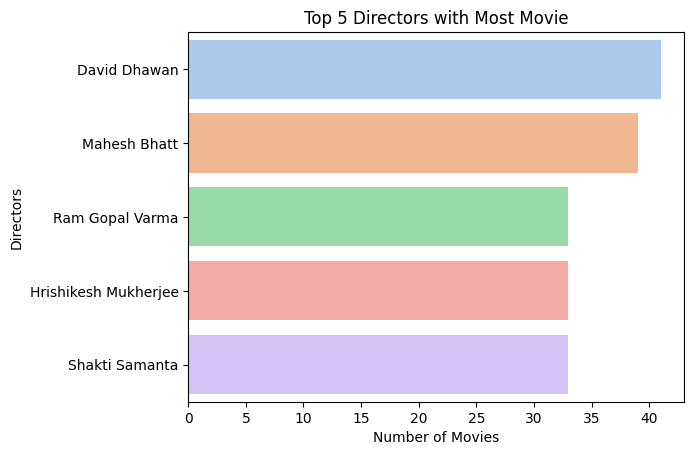

In [ ]:
sns.barplot(x=top_5_directors.values, y=top_5_directors.index,palette = 'pastel')
plt.title('Top 5 Directors with Most Movie')
plt.xlabel('Number of Movies')
plt.ylabel('Directors')
plt.show()

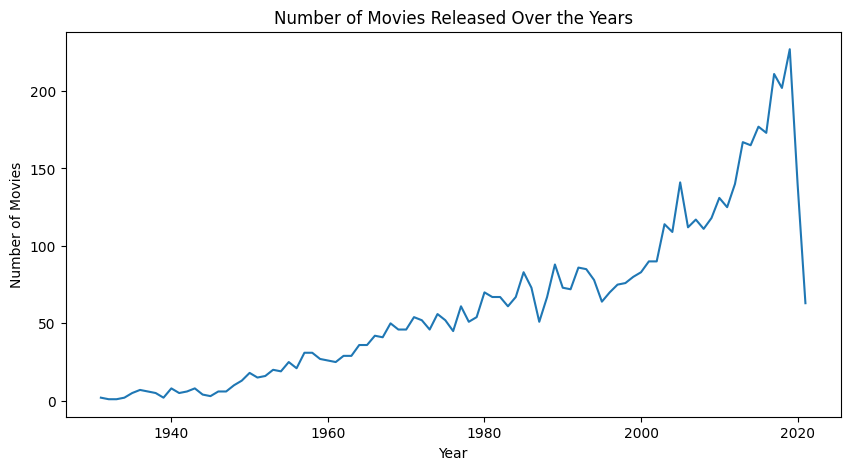

In [ ]:
movies_by_year = data['Year'].value_counts().reset_index()
movies_by_year.columns = ['Year', 'Count']
movies_by_year = movies_by_year.sort_values(by='Year')
plt.figure(figsize=(10, 5))
plt.plot(movies_by_year['Year'], movies_by_year['Count'],linestyle='-')
plt.title('Number of Movies Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

# Model Building

Dropping unnecessary columns

In [ ]:
data

,Year,Duration,Rating,Votes,Genre_Rating,Director_Rating,Actor_Rating,Actor2_Rating,Actor3_Rating
1,2019,109,7.0,8,6.248697,7.000000,6.850000,7.000000,7.000000
3,2019,110,4.4,35,5.838423,4.400000,5.420000,4.400000,4.450000
5,1997,147,4.7,827,5.838423,5.313333,4.788889,5.786667,5.872727
6,2005,142,7.4,1086,6.248697,7.383333,5.435000,6.933333,6.500000
8,2012,82,5.6,326,4.687500,5.600000,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...,...
15493,2015,115,6.1,408,6.248697,6.100000,6.725000,6.100000,5.850000
15494,2001,153,6.2,1496,6.697619,7.250000,4.157143,5.823077,5.954545
15503,1989,125,5.8,44,5.511985,6.270000,6.307692,5.800000,6.050000
15505,1999,129,4.5,655,5.511985,5.225000,5.481707,4.640000,5.737500


Creating new features by grouping and taking their average values

In [ ]:
Genre_Rating = data.groupby("Main Genre")["Rating"].transform('mean')
data["Genre_Rating"] = Genre_Rating
Director_Rating = data.groupby("Director")["Rating"].transform('mean')
data["Director_Rating"] = Director_Rating
Actor1_Rating = data.groupby("Actor 1")["Rating"].transform('mean')
data["Actor_Rating"] = Actor1_Rating
Actor2_Rating = data.groupby("Actor 2")["Rating"].transform('mean')
data["Actor2_Rating"] = Actor2_Rating
Actor3_Rating = data.groupby("Actor 3")["Rating"].transform('mean')
data["Actor3_Rating"] = Actor3_Rating

Dropping all the unnecessary features

In [ ]:
data = data.drop(["Name","Genre","Director","Actor 1","Actor 2","Actor 3","Main Genre"],axis = 1)

Selecting the features for model building

In [ ]:
X = data.drop("Rating",axis = 1)
y = data["Rating"]

Scaling the values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Splitting the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

Importing and creating models with LinearRegression and XGBRegressor models


In [ ]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
lr = LinearRegression()
xgbr = XGBRegressor()

Training the Data

In [ ]:
lr_model = lr.fit(X_train,y_train)
xgbr_model = xgbr.fit(X_train,y_train)

Predicting the data

In [ ]:
y_pred_lr = lr_model.predict(X_test)
y_pred_xgbr = xgbr_model.predict(X_test)

Checking the r2_score , Mean Squared Error and Mean Absolute Error

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("Linear Regression:")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lr))

Linear Regression:
R2 Score: 0.7861454471187242
Mean Squared Error: 0.41356990672334537
Mean Absolute Error: 0.46864828244423484


In [ ]:
print("XGBRegressor:")
print("R2 Score:", r2_score(y_test, y_pred_xgbr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_xgbr))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_xgbr))

XGBRegressor:
R2 Score: 0.8087358856082792
Mean Squared Error: 0.3698826182691618
Mean Absolute Error: 0.4176456960828621


Testing with custom values

In [ ]:
y_new =xgbr_model.predict(scaler.transform([[2005,142,1086,6.248697,7.383333,5.435000,6.933333,6.500000]]))
y_new.item()

7.2907915115356445